<a href="https://colab.research.google.com/github/pandu1992/PraktikumDataScience/blob/main/Sentiment_Analysis_Seragam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'D:/gantiseragamsekolah.csv'
tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
tweets_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:/gantiseragamsekolah.csv'

In [ ]:
pip install googletrans

In [ ]:
import re
from googletrans import Translator

# Initialize the translator
translator = Translator()

# Function to clean text
def clean_text(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        # Remove user @ references and '#' from hashtags
        text = re.sub(r'\@\w+|\#', '', text)
        # Remove emojis and other non-alphanumeric characters
        text = re.sub(r'[^\w\s]', '', text)
    else:
        # Handle non-string values (e.g., convert to string or skip)
        text = str(text)  # Or handle as needed
    return text

# Clean the "conversation_id_str" column  (assuming this is the column you want to clean)
tweets_df['Cleaned_Content'] = tweets_df['conversation_id_str'].apply(clean_text)

# Display the first few rows of the dataset to check the changes
tweets_df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Cleaned_Content
0,1834495651566288911,Fri Sep 13 07:33:41 +0000 2024,0,konsepnya mirip kayak dulu setiap pulang sekol...,1834495651566288911,NaN,NaN,in,NaN,0,0,0,https://x.com/eliensambat/status/1834495651566...,1232570228590010368,eliensambat,1834495651566288911
1,1834384449305543018,Fri Sep 13 00:11:48 +0000 2024,7,Mama ku sampe kesel sekolah kok tiap tahun gan...,1834384449305543018,NaN,NaN,in,"DKI Jakarta, Indonesia",0,0,0,https://x.com/akulupaminum/status/183438444930...,1026418619989733376,akulupaminum,1834384449305543018
2,1833501473943990434,Tue Sep 10 13:43:10 +0000 2024,0,serius serius ini kenapa mendadak dongdengs se...,1833501473943990434,NaN,NaN,in,+62,0,0,0,https://x.com/arretedemetr/status/183350147394...,1265952005513547776,arretedemetr,1833501473943990434
3,1832774395649212905,Tue Sep 10 08:17:26 +0000 2024,3,@koplak @kegblgnunfaedh anjjj gue pernah wktu ...,1833419500701782090,NaN,koplak,in,NaN,0,2,0,https://x.com/sovrsaly_/status/183341950070178...,1745020615411781632,sovrsaly_,1832774395649212905
4,1830931899419893858,Tue Sep 03 11:32:36 +0000 2024,0,BAYANGIN BERAPA TAHUN LAMANYA MASALAH MENDASAR...,1830931899419893858,NaN,NaN,in,Indonesia,0,0,0,https://x.com/dgrayi13/status/1830931899419893858,494644333,dgrayi13,1830931899419893858


In [ ]:
# Remove the character ',' from the 'Cleaned_Content' column
tweets_df['Cleaned_Content'] = tweets_df['Cleaned_Content'].str.replace(',', '', regex=False)

# Display the updated data
tweets_df[['conversation_id_str', 'Cleaned_Content']].head() # Changed 'Content' to 'conversation_id_str' assuming this is the column you intended to display

,conversation_id_str,Cleaned_Content
0,1834495651566288911,1834495651566288911
1,1834384449305543018,1834384449305543018
2,1833501473943990434,1833501473943990434
3,1832774395649212905,1832774395649212905
4,1830931899419893858,1830931899419893858


In [ ]:
tweets_df['Cleaned_Content']

,Cleaned_Content
0,1834495651566288911
1,1834384449305543018
2,1833501473943990434
3,1832774395649212905
4,1830931899419893858
...,...
403,1777965702785458356
404,1777965702785458356
405,1777965702785458356
406,1777965702785458356


In [ ]:
import requests, uuid, json

def translate(text):
    # Add your key and endpoint
    key = "5f1ca7c960ab43adbe7faa3b3b8273ad"
    endpoint = "https://api.cognitive.microsofttranslator.com"

    # location, also known as region.
    # required if you're using a multi-service or regional (not global) resource. It can be found in the Azure portal on the Keys and Endpoint page.
    location = "global"

    path = '/translate'
    constructed_url = endpoint + path

    params = {
        'api-version': '3.0',
        'from': 'id',
        'to': 'en'
    }

    headers = {
        'Ocp-Apim-Subscription-Key': key,
        'Ocp-Apim-Subscription-Region': location,
        'Content-type': 'application/json',
        'X-ClientTraceId': str(uuid.uuid4())
    }

    body = [{
        'text': text,
    }]

    request = requests.post(constructed_url, params=params, headers=headers, json=body)
    response = request.json()
    print('translating: ', text)
    return response[0]['translations'][0]['text']

# Translate the cleaned text to English
tweets_df['Translated_Content'] = tweets_df['Cleaned_Content'].apply(lambda x: translate(x))

# Save the translated dataset
tweets_df.to_csv('translated_tweets.csv', index=False)

translating:  1834495651566288911
translating:  1834384449305543018
translating:  1833501473943990434
translating:  1832774395649212905
translating:  1830931899419893858
translating:  1830245608034296238
translating:  1830199683722981513
translating:  1829533356943462675
translating:  1829808969201958918
translating:  1829533356943462675
translating:  1829533356943462675
translating:  1828989496928678018
translating:  1829503907594457289
translating:  1829339424838304226
translating:  1829099708834512985
translating:  1828943796773761515
translating:  1827421138588520564
translating:  1827312498799997278
translating:  1827204076096155989
translating:  1826070506379841704
translating:  1825556395921682691
translating:  1825116014796755184
translating:  1825772694861918626
translating:  1825165112724033971
translating:  1825165112724033971
translating:  1825165112724033971
translating:  1825381848673051059
translating:  1825165112724033971
translating:  1825165112724033971
translating:  

In [ ]:
tweets_df['Translated_Content']

,Translated_Content
0,1834495651566288911
1,1834384449305543018
2,1833501473943990434
3,1832774395649212905
4,1830931899419893858
...,...
403,1777965702785458356
404,1777965702785458356
405,1777965702785458356
406,1777965702785458356


In [ ]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply the sentiment analysis model to the 'Translated_Content' column
# Here we assume 'Translated_Content' is the column with the text data
tweets_df['Sentiment'] = tweets_df['Translated_Content'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Save the results to a new CSV file
tweets_df.to_csv('tweets_with_sentiment.csv', index=False)

# Display the first few rows with the new 'Sentiment' column
print(tweets_df.head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


   conversation_id_str                      created_at  favorite_count  \
0  1834495651566288911  Fri Sep 13 07:33:41 +0000 2024               0   
1  1834384449305543018  Fri Sep 13 00:11:48 +0000 2024               7   
2  1833501473943990434  Tue Sep 10 13:43:10 +0000 2024               0   
3  1832774395649212905  Tue Sep 10 08:17:26 +0000 2024               3   
4  1830931899419893858  Tue Sep 03 11:32:36 +0000 2024               0   

                                           full_text               id_str  \
0  konsepnya mirip kayak dulu setiap pulang sekol...  1834495651566288911   
1  Mama ku sampe kesel sekolah kok tiap tahun gan...  1834384449305543018   
2  serius serius ini kenapa mendadak dongdengs se...  1833501473943990434   
3  @koplak @kegblgnunfaedh anjjj gue pernah wktu ...  1833419500701782090   
4  BAYANGIN BERAPA TAHUN LAMANYA MASALAH MENDASAR...  1830931899419893858   

  image_url in_reply_to_screen_name lang                location  quote_count  \
0       NaN

In [ ]:
tweets_df['Sentiment']

,Sentiment
0,NEGATIVE
1,NEGATIVE
2,NEGATIVE
3,NEGATIVE
4,NEGATIVE
...,...
403,NEGATIVE
404,NEGATIVE
405,NEGATIVE
406,NEGATIVE


In [ ]:
import pandas as pd

# Load the dataset
# Check if 'tweets_with_sentiment.csv' exists in the current directory
# or if the file has a different name
file_path = 'tweets_with_sentiment.csv'
tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
tweets_df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Cleaned_Content,Translated_Content,Sentiment
0,1834495651566288911,Fri Sep 13 07:33:41 +0000 2024,0,konsepnya mirip kayak dulu setiap pulang sekol...,1834495651566288911,NaN,NaN,in,NaN,0,0,0,https://x.com/eliensambat/status/1834495651566...,1232570228590010368,eliensambat,1834495651566288911,1834495651566288911,NEGATIVE
1,1834384449305543018,Fri Sep 13 00:11:48 +0000 2024,7,Mama ku sampe kesel sekolah kok tiap tahun gan...,1834384449305543018,NaN,NaN,in,"DKI Jakarta, Indonesia",0,0,0,https://x.com/akulupaminum/status/183438444930...,1026418619989733376,akulupaminum,1834384449305543018,1834384449305543018,NEGATIVE
2,1833501473943990434,Tue Sep 10 13:43:10 +0000 2024,0,serius serius ini kenapa mendadak dongdengs se...,1833501473943990434,NaN,NaN,in,+62,0,0,0,https://x.com/arretedemetr/status/183350147394...,1265952005513547776,arretedemetr,1833501473943990434,1833501473943990434,NEGATIVE
3,1832774395649212905,Tue Sep 10 08:17:26 +0000 2024,3,@koplak @kegblgnunfaedh anjjj gue pernah wktu ...,1833419500701782090,NaN,koplak,in,NaN,0,2,0,https://x.com/sovrsaly_/status/183341950070178...,1745020615411781632,sovrsaly_,1832774395649212905,1832774395649212905,NEGATIVE
4,1830931899419893858,Tue Sep 03 11:32:36 +0000 2024,0,BAYANGIN BERAPA TAHUN LAMANYA MASALAH MENDASAR...,1830931899419893858,NaN,NaN,in,Indonesia,0,0,0,https://x.com/dgrayi13/status/1830931899419893858,494644333,dgrayi13,1830931899419893858,1830931899419893858,NEGATIVE


Sentiment
NEGATIVE    373
POSITIVE     35
Name: count, dtype: int64


<ipython-input-37-40ff640bdeef>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tweets_df, x='Sentiment', palette='viridis')


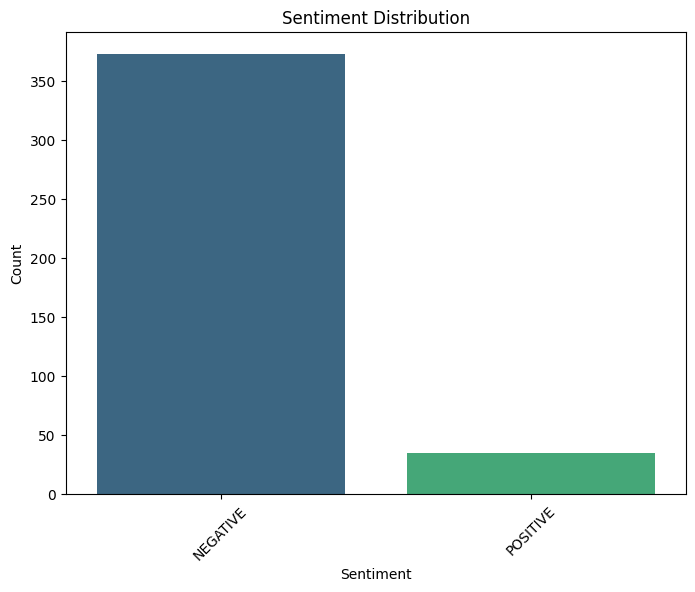

Positive: 35, Negative: 373, Neutral: 0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the 'Sentiment' column
sentiment_counts = tweets_df['Sentiment'].value_counts()
print(sentiment_counts)

# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=tweets_df, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Additional statistics (optional)
# Example: Count the number of positive, negative, and neutral sentiments
positive_count = tweets_df[tweets_df['Sentiment'] == 'POSITIVE'].shape[0]
negative_count = tweets_df[tweets_df['Sentiment'] == 'NEGATIVE'].shape[0]
neutral_count = tweets_df[tweets_df['Sentiment'] == 'NEUTRAL'].shape[0] # if available

print(f"Positive: {positive_count}, Negative: {negative_count}, Neutral: {neutral_count}")

* Check Data Loading: If you loaded the data from a file (CSV), re-import it to ensure it's loaded correctly.
* Verify Initial Data Processing: If the original DataFrame had data before applying any processing, check earlier parts of your code for any operations (such as filters or cleaning steps) that might have removed all the rows.
* Run the Analysis on Raw Data: If the reloaded DataFrame contains data, try applying the sentiment analysis to the appropriate column (e.g., full_text or Translated_Content).

Note: The reloaded DataFrame now contains 408 rows (lihat hasil), which indicates that the data is correctly loaded this time. The full_text column also appears to have meaningful text content, which can be used for sentiment analysis. Let's proceed by performing the sentiment analysis on the full_text column.

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path
tweets_df = pd.read_csv('/content/gantiseragamsekolah.csv')

# Check the shape of the newly loaded DataFrame
print(f"DataFrame shape after reloading: {tweets_df.shape}")

# Display the first few rows to inspect content
print(tweets_df.head())


DataFrame shape after reloading: (408, 15)
   conversation_id_str                      created_at  favorite_count  \
0  1834495651566288911  Fri Sep 13 07:33:41 +0000 2024               0   
1  1834384449305543018  Fri Sep 13 00:11:48 +0000 2024               7   
2  1833501473943990434  Tue Sep 10 13:43:10 +0000 2024               0   
3  1832774395649212905  Tue Sep 10 08:17:26 +0000 2024               3   
4  1830931899419893858  Tue Sep 03 11:32:36 +0000 2024               0   

                                           full_text               id_str  \
0  konsepnya mirip kayak dulu setiap pulang sekol...  1834495651566288911   
1  Mama ku sampe kesel sekolah kok tiap tahun gan...  1834384449305543018   
2  serius serius ini kenapa mendadak dongdengs se...  1833501473943990434   
3  @koplak @kegblgnunfaedh anjjj gue pernah wktu ...  1833419500701782090   
4  BAYANGIN BERAPA TAHUN LAMANYA MASALAH MENDASAR...  1830931899419893858   

  image_url in_reply_to_screen_name lang         

Check for Missing or Empty Text:

1.   Remove any empty or NaN entries in the full_text column.
2.   Apply Sentiment Analysis: Use the full_text column for sentiment analysis.
3. Save the Data: Store the results in a new CSV file.

Note:

* The sentiment analysis has successfully executed, and now the DataFrame contains the new Sentiment column filled with values, primarily labeled as "NEGATIVE" in the sample output you shared. This indicates that the full_text entries were correctly processed by the sentiment analysis model.

* Explanation of the Output: Warning Messages: The messages about using the default model (distilbert-base-uncased-finetuned-sst-2-english) and deprecation warnings are normal and do not affect the functionality. However, you can specify a model in the pipeline() if you want to avoid these warnings.

* Data Inspection: The output shows that the sentiment analysis has been applied to the full_text column, producing valid sentiment labels in the Sentiment column.

In [ ]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Remove NaN or empty entries from 'full_text'
tweets_df['full_text'] = tweets_df['full_text'].replace('', None).dropna()

# Apply sentiment analysis to the 'full_text' column
tweets_df['Sentiment'] = tweets_df['full_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'] if pd.notnull(x) else None)

# Save the results to a new CSV file
tweets_df.to_csv('tweets_with_sentiment.csv', index=False)

# Display the first few rows with the new 'Sentiment' column
print(tweets_df.head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


   conversation_id_str                      created_at  favorite_count  \
0  1834495651566288911  Fri Sep 13 07:33:41 +0000 2024               0   
1  1834384449305543018  Fri Sep 13 00:11:48 +0000 2024               7   
2  1833501473943990434  Tue Sep 10 13:43:10 +0000 2024               0   
3  1832774395649212905  Tue Sep 10 08:17:26 +0000 2024               3   
4  1830931899419893858  Tue Sep 03 11:32:36 +0000 2024               0   

                                           full_text               id_str  \
0  konsepnya mirip kayak dulu setiap pulang sekol...  1834495651566288911   
1  Mama ku sampe kesel sekolah kok tiap tahun gan...  1834384449305543018   
2  serius serius ini kenapa mendadak dongdengs se...  1833501473943990434   
3  @koplak @kegblgnunfaedh anjjj gue pernah wktu ...  1833419500701782090   
4  BAYANGIN BERAPA TAHUN LAMANYA MASALAH MENDASAR...  1830931899419893858   

  image_url in_reply_to_screen_name lang                location  quote_count  \
0       NaN

World cloud untuk Negative Statement

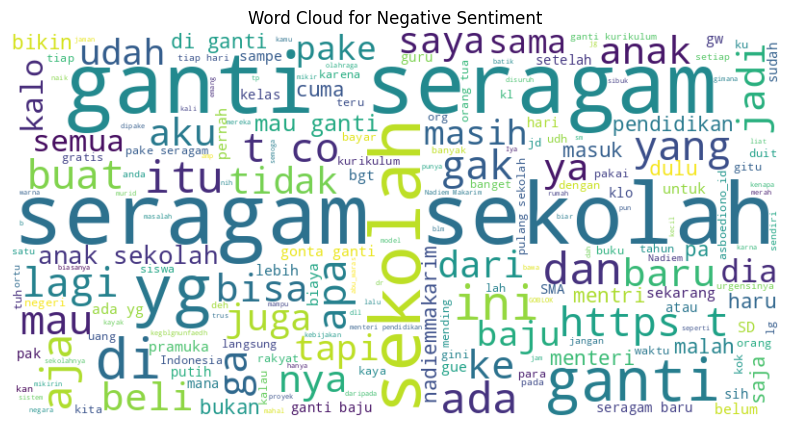

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for negative sentiments
negative_tweets = tweets_df[tweets_df['Sentiment'] == 'NEGATIVE']['full_text']

# Combine all the negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()


World cloud untuk Positive Statement

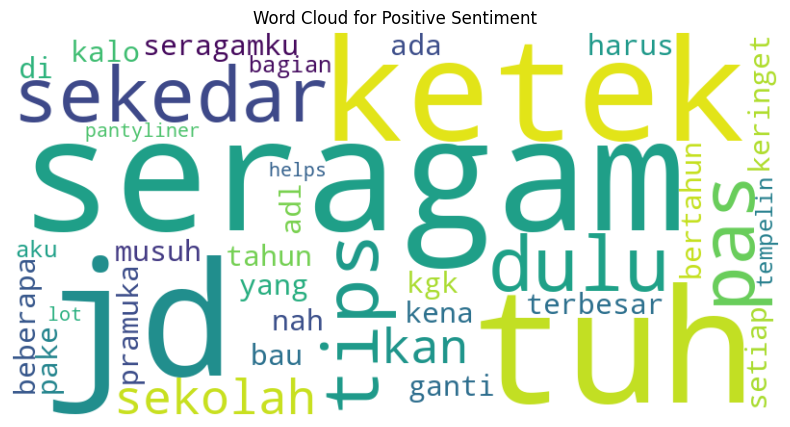

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter for positive sentiments
positive_tweets = tweets_df[tweets_df['Sentiment'] == 'POSITIVE']['full_text']

# Combine all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


Distribusi Sentiment semua username namun terlalu padat dan susah untuk diamati

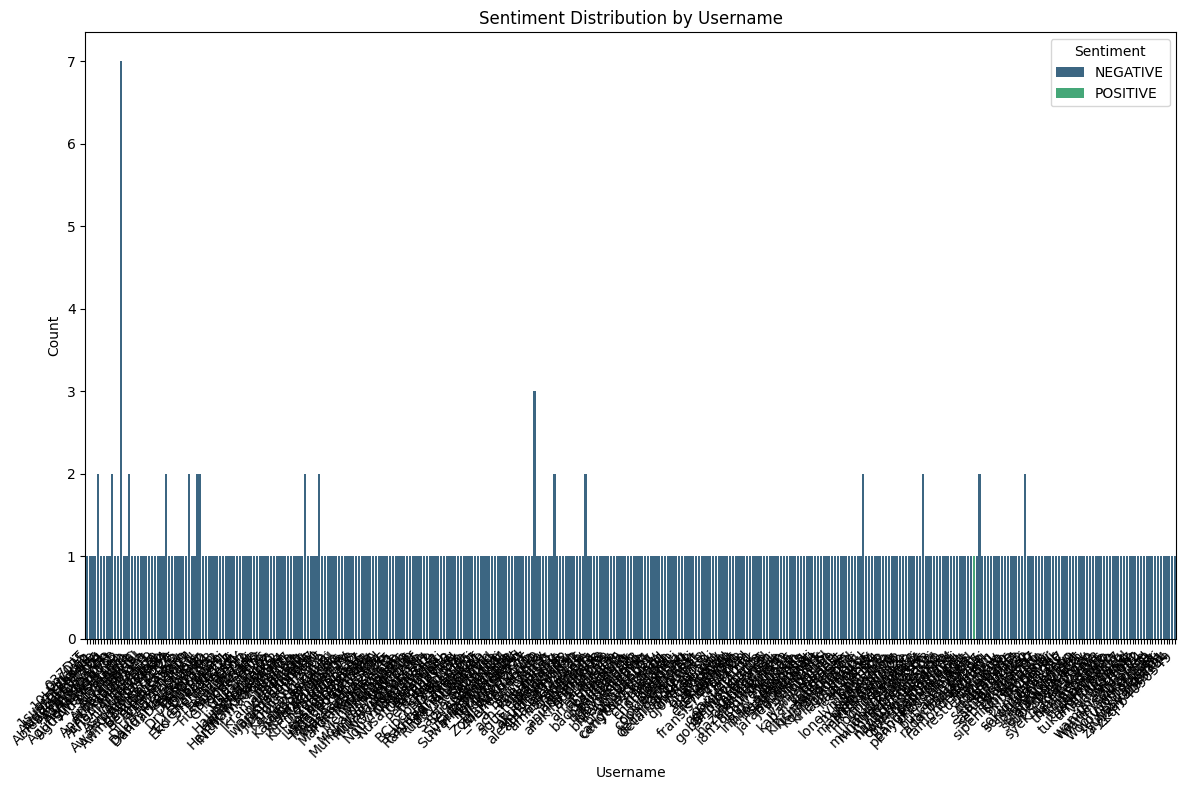

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'username' and 'Sentiment', and count occurrences
grouped_data = tweets_df.groupby(['username', 'Sentiment']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='username', y='Count', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Username')
plt.xlabel('Username')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


TOP 20 username Kombinasi Positive dan Negative

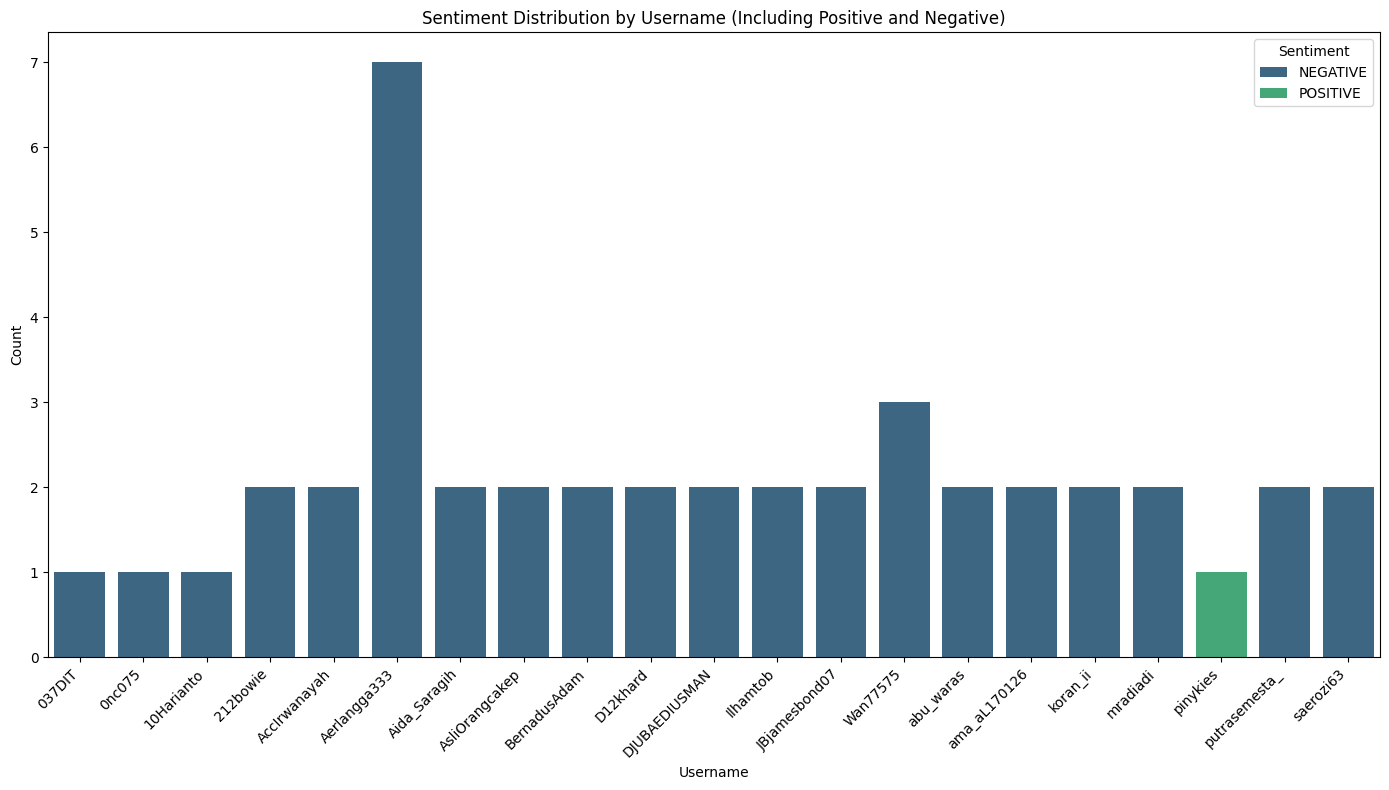

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group the data by 'username' and 'Sentiment', and count occurrences
grouped_data = tweets_df.groupby(['username', 'Sentiment']).size().reset_index(name='Count')

# Filter for only 'POSITIVE' and 'NEGATIVE' sentiments
positive_negative_data = grouped_data[grouped_data['Sentiment'].isin(['POSITIVE', 'NEGATIVE'])]

# Get usernames with at least one positive sentiment
usernames_with_positive = positive_negative_data[positive_negative_data['Sentiment'] == 'POSITIVE']['username']

# Combine these usernames with the top 20 by total count (positive + negative)
top_usernames_combined = positive_negative_data.groupby('username')['Count'].sum().nlargest(20).index
selected_usernames = pd.concat([usernames_with_positive, pd.Series(top_usernames_combined)]).unique()

# Filter the data to include the selected usernames
filtered_combined_data = positive_negative_data[positive_negative_data['username'].isin(selected_usernames)]

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_combined_data, x='username', y='Count', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution by Username (Including Positive and Negative)')
plt.xlabel('Username')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


